Importing necessary libraries and packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

Loading the dataset

In [2]:
df=pd.read_csv("TitanicSurvival.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Information about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Describing the dataset

In [4]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Checking for missing values

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Checking the datatype of each feature

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Checking for duplicate values

In [7]:
df.duplicated().sum()

0

Dropping unnecessary column

In [8]:
df=df.drop(["PassengerId","Name","Ticket","Ticket","Cabin"],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


Survival count plot

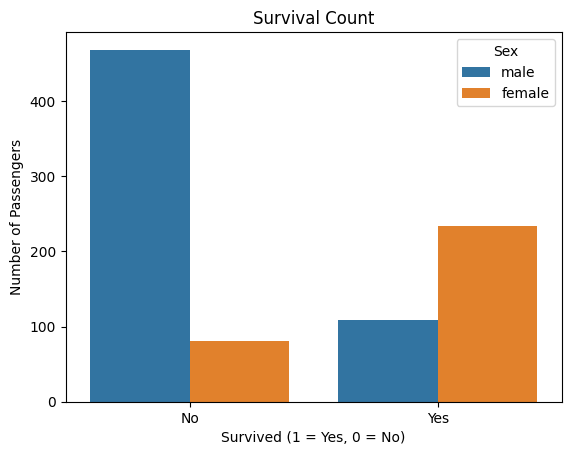

In [9]:
sns.countplot(x=df["Survived"],data=df,hue=df["Sex"])
plt.title('Survival Count')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Number of Passengers')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Gender count plot

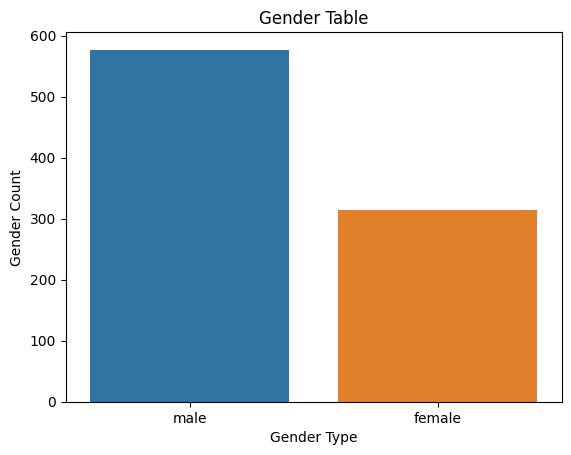

In [10]:
sns.countplot(x=df["Sex"],data=df,hue=df["Sex"])
plt.title("Gender Table")
plt.xlabel('Gender Type')
plt.ylabel('Gender Count')
plt.show()

Swarm plot of Gender vs Age

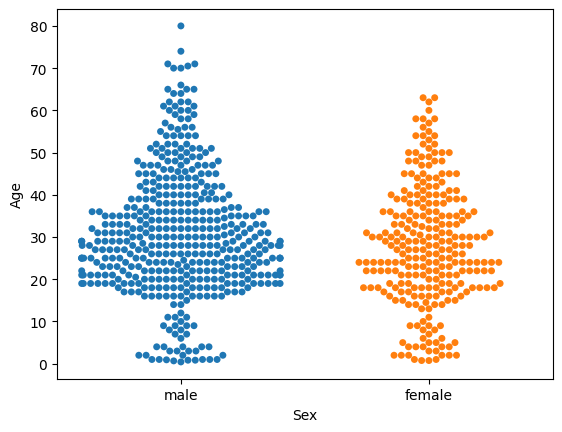

In [11]:
sns.swarmplot(x="Sex", y="Age",data=df,hue='Sex')
plt.show()

Count plot of passengers in each class

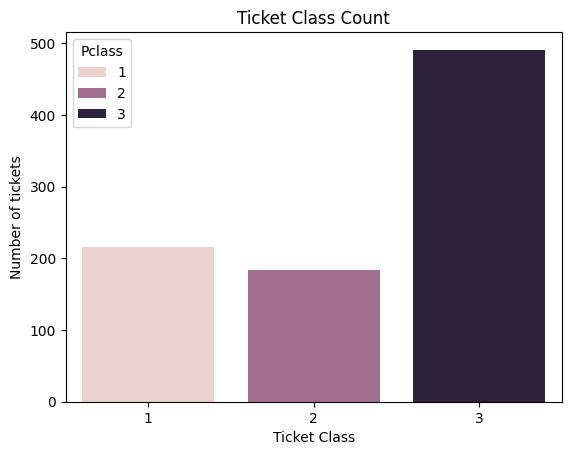

In [12]:
sns.countplot(x=df["Pclass"],data=df,hue=df["Pclass"])
plt.title("Ticket Class Count")
plt.ylabel('Number of tickets')
plt.xlabel('Ticket Class')
plt.show()

Count plot of port of embarkation vs number of people

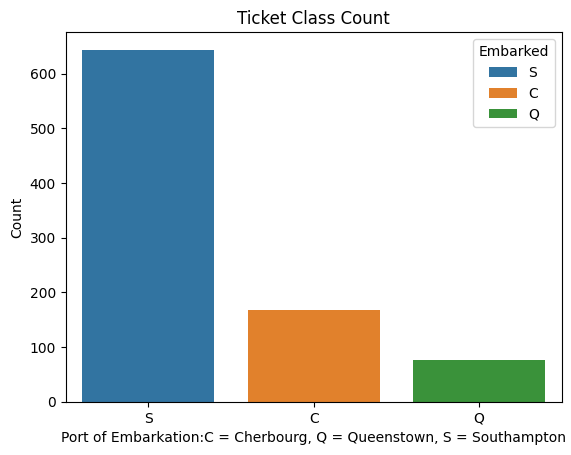

In [13]:
sns.countplot(x=df["Embarked"],data=df,hue=df["Embarked"])
plt.title("Ticket Class Count")
plt.ylabel('Count')
plt.xlabel('Port of Embarkation:C = Cherbourg, Q = Queenstown, S = Southampton')
plt.show()

Age distribution plot

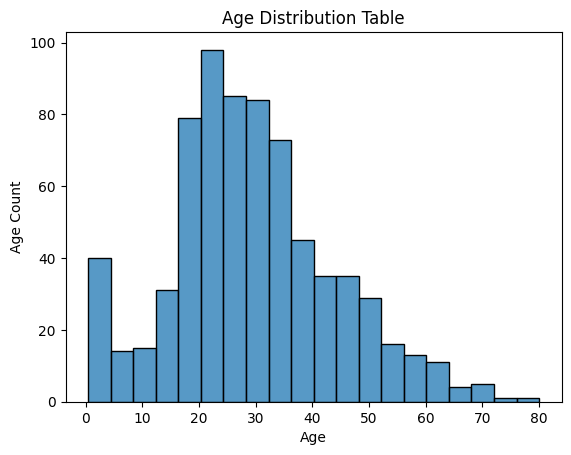

In [14]:
sns.histplot(x=df['Age'])
plt.title("Age Distribution Table")
plt.xlabel("Age")
plt.ylabel('Age Count')
plt.show()

Converting categorical columns into numerical columns

In [15]:
columns=["Sex","Embarked"]
le=LabelEncoder()
for column in columns:
    df[column]=le.fit_transform(df[column])

In [16]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


Checking the correlation between different features

In [17]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.157112
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.025252
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.066654
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.038322
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.221226
Embarked,-0.163517,0.157112,0.104057,-0.025252,0.066654,0.038322,-0.221226,1.000000


Plotting the correlation heatmap

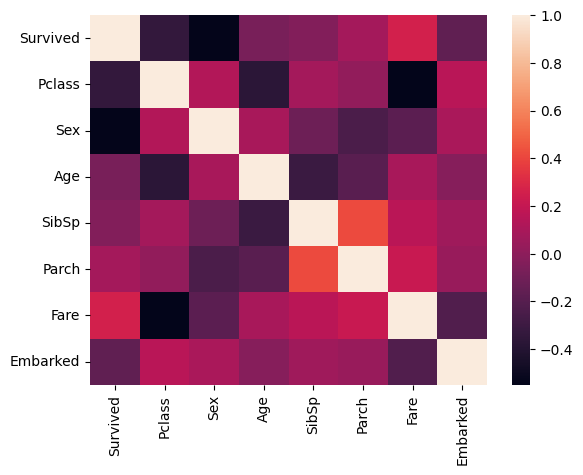

In [18]:
sns.heatmap(df.corr())
plt.show()

Filling the missing values in Age and Embarked column

In [19]:
df["Age"]=df["Age"].fillna(df["Age"].mode()[0])
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

Splitting input and output

In [20]:
X=df.drop(["Survived"],axis=1).values
X

array([[ 3.    ,  1.    , 22.    , ...,  0.    ,  7.25  ,  2.    ],
       [ 1.    ,  0.    , 38.    , ...,  0.    , 71.2833,  0.    ],
       [ 3.    ,  0.    , 26.    , ...,  0.    ,  7.925 ,  2.    ],
       ...,
       [ 3.    ,  0.    , 24.    , ...,  2.    , 23.45  ,  2.    ],
       [ 1.    ,  1.    , 26.    , ...,  0.    , 30.    ,  0.    ],
       [ 3.    ,  1.    , 32.    , ...,  0.    ,  7.75  ,  1.    ]])

In [21]:
y=df.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Scaling the input using MinMax scaler

In [22]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[1.        , 1.        , 0.27117366, ..., 0.        , 0.01415106,
        0.66666667],
       [0.        , 0.        , 0.4722292 , ..., 0.        , 0.13913574,
        0.        ],
       [1.        , 0.        , 0.32143755, ..., 0.        , 0.01546857,
        0.66666667],
       ...,
       [1.        , 0.        , 0.2963056 , ..., 0.33333333, 0.04577135,
        0.66666667],
       [0.        , 1.        , 0.32143755, ..., 0.        , 0.0585561 ,
        0.        ],
       [1.        , 1.        , 0.39683338, ..., 0.        , 0.01512699,
        0.33333333]])

Splitting the dataset into training and testing dataset

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=83)

Building different predictive classification models

In [24]:
knn=KNeighborsClassifier()
svc=SVC()
nb=GaussianNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier(random_state=1)
ab=AdaBoostClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)
xb=XGBClassifier(random_state=1)
models=[knn,svc,nb,dt,rf,ab,gb,xb]
for model in models:
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(model)
  print(classification_report(y_test,y_pred))
  print('*'*55)

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       174
           1       0.76      0.69      0.73        94

    accuracy                           0.82       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.82      0.81       268

*******************************************************
SVC()
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       174
           1       0.83      0.64      0.72        94

    accuracy                           0.83       268
   macro avg       0.83      0.78      0.80       268
weighted avg       0.83      0.83      0.82       268

*******************************************************
GaussianNB()
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       174
           1       0.75      0.76      0.75        94

    accuracy                

Since GradientBoostingClassifier has the highest accuracy of 87 %, using that model for prediction purpose

In [25]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

Plotting confusion matrix

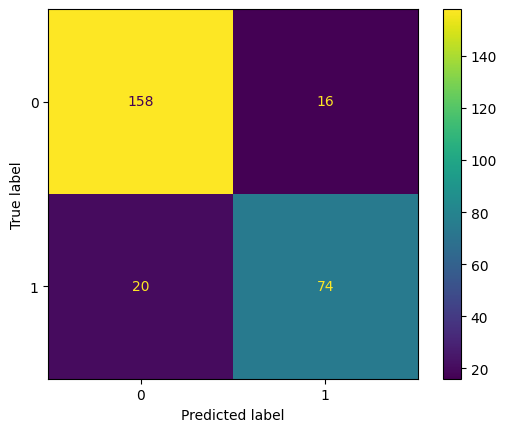

In [26]:
y_pred=gb.predict(X_test)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

Predicting new values

In [27]:
y_pred_new=gb.predict(scaler.transform([[3,1,22.0,1,0,7.2500,2]]))
print("Passenger Survived" if y_pred_new.item() ==1 else "Passenger Did Not Survive")

Passenger Did Not Survive
